## ECE 143 INDIVIDUAL PROJECT

Name: Yancong Deng

PID: A10971125




Please Enter region's width: 5
Please Enter region's length: 5
tower_origin & tower_retangle
[2 3]
[2 2]
temp_region
[[ 1.  1.  2.  1.  0.]
 [ 1.  1.  2.  1.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]]
overlap_x & overlap_y
[2 2]
[3 4]
overlap_pnt
[[3 2]
 [4 2]]
tower_pnt
[[3 2]
 [4 2]
 [3 3]
 [4 3]]
[[ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
temp_x,temp_y
[3 3]
[3 4]


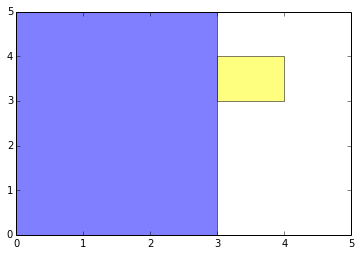

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import numpy as np
import random

def user_input():
    '''
    ask user to enter region's width and length
    >>region_width = interger
    >>region_length = interger
    >>recursively call user_input() when input is not interger
    '''  
    region_width=0
    region_length=0
    try:
        region_width = input("Please Enter region's width: ")
        assert isinstance(region_width, int)
        assert region_width>0
        region_length = input("Please Enter region's length: ")
        assert isinstance(region_length, int)
        assert region_length>0
        return region_width,region_length
    except: 
        print "Please Enter interger > 0"
        return user_input()

def generate_region(region_width,region_length):
    '''
    draw retangle region based on user input region_width and region_length
    set initial tower located at origin (0,0) with random width and length
    Note: Tower must completely within the defined region
    otherwise, need to regenerate width and length
    
    Function input:
    >>region_width
    >>region_length
    
    Plot: shown retangle region and output initail retangle tower.
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    
    plt.figure()
    plt.xlim(0, region_width)
    plt.ylim(0, region_length)
    #plt.gca().add_patch(patches.Rectangle((0, 0),0.5,0.5,color='yellow'))
    #initial origin = [0,0]
    origin = np.array([0,0])
    #initial dimension
    region = np.zeros((region_width,region_length))
    dim = generate_tower_dimension(origin,region_width,region_length)
    region[0:dim[0],0:dim[1]] = 1
    region_area = region_width * region_length
    return origin,dim, region,region_area
    #plt.gca().add_patch(patches.Rectangle((init_origin[0], init_origin[1]),init_dim[0],init_dim[1],facecolor="blue", alpha=0.5))


def generate_tower_origin(region_width,region_length):
    '''
    generate new tower origin
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin_x = random.randrange(1, region_width, 1)
    origin_y = random.randrange(1, region_length, 1)
    return np.array([origin_x,origin_y])

def generate_tower_dimension(origin, region_width,region_length):
    '''
    generate new tower dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    assert type(origin).__module__ == "numpy"
    tower_width = random.randrange(1, region_width+1-origin[0], 1)
    tower_length = random.randrange(1, region_length+1-origin[1], 1)
    return np.array([tower_width,tower_length])

def generate_tower(region_width,region_length):
    '''
    generate new tower origin and dimension
    return numpy object
    '''
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    origin= generate_tower_origin(region_width,region_length)
    tower_retangle = generate_tower_dimension(origin, region_width,region_length)
    return origin,tower_retangle
    
def plot_tower(origin,dim):
    '''
    plot tower retangle
    '''
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    #assert isinstance(origin, list)
    #assert isinstance(dim, list)
    color_map = [ 'blue','yellow', 'grey', 'green', 'purple','red']
    if len(origin.shape)==1:
        x=len(origin.shape)
        plt.gca().add_patch(patches.Rectangle((origin[0],origin[1]),dim[0],dim[1],facecolor="blue", alpha=0.5))
    elif len(origin.shape)>1:
        x = origin.shape[0]
        color_ind = 0
        for i in range(x):
            if color_ind > 5:
                color_ind = 0
            plt.gca().add_patch(patches.Rectangle((origin[i][0],origin[i][1]),dim[i][0],dim[i][1],facecolor=color_map[color_ind], alpha=0.5))
            color_ind += 1
        #plt.gca().add_patch(patches.Rectangle((origin[0], origin[1]),tower_retangle[0],tower_retangle[1],facecolor="yellow",alpha=0.5))

        
def trim_retangle(region_width,region_length,origin,dim,region):
    assert type(origin).__module__ == "numpy"
    assert type(dim).__module__ == "numpy"
    assert type(region).__module__ == "numpy"
    assert isinstance(region_width, int)
    assert isinstance(region_length, int)
    area = 0
    add_origin = 0
    new_region = np.zeros((region_width,region_length))
    new_region[origin[0]:origin[0]+dim[0],origin[1]:origin[1]+dim[1]] = 1
    temp_region = region + new_region
    #print np.rot90(region)
    #print np.rot90(new_region)
    print "temp_region"
    print np.rot90(temp_region)
    overlap_x, overlap_y = np.where(temp_region == 2)
    print "overlap_x & overlap_y"
    print overlap_x
    print overlap_y
    if overlap_x.shape[0] == 0:
        region = temp_region
        area = np.sum(region)
        add_origin = 1
        return region,origin,dim, area,add_origin
    else:
        for i in range(overlap_x.shape[0]):
            if i == 0:
                overlap_pnt = np.array([overlap_y[i],overlap_x[i]]) 
            else:
                overlap_pnt = np.vstack((overlap_pnt,np.array([overlap_y[i],overlap_x[i]]))) 
        print "overlap_pnt"
        print overlap_pnt
        for i in range(0,dim[0],1):
            for j in range(0,dim[1],1):
                if i == 0 and j == 0:
                    tower_pnt = np.array([origin[1],origin[0]])
                else:
                    tower_pnt = np.vstack((tower_pnt,np.array([origin[1]+j,origin[0]+i]))) 
        print "tower_pnt"
        print tower_pnt
        if np.array_equal(tower_pnt,overlap_pnt):
            area = np.sum(region)
            origin = np.array([0,0])
            dim = np.array([0,0])
            return region,origin,dim, area,add_origin
        else:
            trim_region = new_region
            for i in range(overlap_x.shape[0]):
                trim_region[overlap_x[i]][overlap_y[i]] = 0
            print np.rot90(trim_region)
            temp_x,temp_y = np.where(trim_region==1)
            print "temp_x,temp_y"
            print temp_x
            print temp_y
            if temp_x.shape[0] == 1:
                origin = np.array([temp_x[0],temp_y[0]])
                dim = np.array([1,1])
                region = trim_region + region
                add_origin = 1
                return region,origin,dim, area,add_origin
            elif temp_x.shape[0] == 2:
                origin = np.array([temp_x[0],temp_y[0]])
                if temp_x[0]==temp_x[1]:
                    dim = np.array([2,1])
                elif temp_y[0]==temp_y[1]:
                    dim = np.array([1,2])
                else :
                    dim = np.array([1,1])
                dim = np.array([1,1])
                region = trim_region + region
                add_origin = 1
                return region,origin,dim, area,add_origin
            else:
            for i in range(temp_x.shape[0]):
                x1, y1 = np.where(temp_x == temp_x[i])
                x2, y2 = np.where(temp_y == temp_y[i])
                temp_x[i]
                temp_y[i]
            return region,origin,dim, area, add_origin
    return region,origin,dim, area, add_origin
    
########################################################################################################    
region_width,region_length = user_input()
init_origin,init_dim,region,region_area = generate_region(region_width,region_length)
origin =init_origin
dim =init_dim

#plot_tower(origin,dim)
tower_origin,tower_retangle = generate_tower(region_width,region_length)
print "tower_origin & tower_retangle"
print tower_origin
print tower_retangle
region,trim_origin,trim_dim,area,add_origin = trim_retangle(region_width,region_length,tower_origin,tower_retangle,region)

if add_origin!=0:
    origin = np.vstack((origin,trim_origin))
    dim = np.vstack((dim,trim_dim))
#print tower_origin
plot_tower(origin,dim)
plt.show()

x = np.array([1,2])
y = np.array([1,4])

x = np.vstack((x,y))
x = np.vstack((x,y))
assert type(x).__module__ == "numpy"
